In [5]:
# Import necessary libraries
from enum import auto
import json
import joblib
import os
import streamlit as st
from itertools import cycle
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import urllib
from skimage import io
import pdb
#*** added
from PIL import Image
import webcolors
#***
import seaborn as sns
import pandas as pd
import base64
from art_api import utils
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Predict colour

1. Obtain image from user
2. Resize image and store in dir_sm as img_sm
4. Read img_sm from dir_sm
5. Get colours from image_sm
6. Use yellowbrick to generate optimal K
7. Optimal K used to generate df of up to 7 optimal colours per image
8. Display to user
9. Save to CSV

In [264]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [265]:
get_image("../raw_data/test/2010-00832_o3.jpg")

array([[[239, 234, 228],
        [239, 234, 228],
        [239, 234, 228],
        ...,
        [238, 231, 221],
        [239, 230, 221],
        [239, 230, 221]],

       [[239, 234, 228],
        [239, 234, 228],
        [239, 234, 228],
        ...,
        [239, 232, 222],
        [239, 230, 221],
        [239, 230, 221]],

       [[239, 234, 228],
        [239, 234, 228],
        [239, 234, 228],
        ...,
        [239, 232, 222],
        [240, 231, 222],
        [239, 230, 221]],

       ...,

       [[247, 240, 230],
        [247, 240, 230],
        [247, 240, 230],
        ...,
        [245, 236, 227],
        [245, 236, 227],
        [245, 236, 227]],

       [[247, 240, 230],
        [247, 240, 230],
        [247, 240, 230],
        ...,
        [245, 236, 227],
        [245, 236, 227],
        [245, 236, 227]],

       [[247, 240, 230],
        [247, 240, 230],
        [247, 240, 230],
        ...,
        [245, 236, 227],
        [245, 236, 227],
        [245, 236, 227]]

In [266]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [267]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    #hex_colors = pd.DataFrame([RGB2HEX(ordered_colors[i]) for i in counts.keys()]).T
    #rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    # return rgb_colors
    print(counts.values())
    print(hex_colors)
    X = clf.cluster_centers_
    y = counts.values()
    return hex_colors, X, y

In [268]:
filename = "../raw_data/test/2010-00832_o3.jpg"

In [252]:
print(os.path.splitext(os.path.basename(filename))[0])
# filename.tar

fname = os.path.basename(filename).split('.', 1)[0]

2010-00832_o3


In [272]:
get_image("../raw_data/test/2010-00832_o3.jpg")

array([[[239, 234, 228],
        [239, 234, 228],
        [239, 234, 228],
        ...,
        [238, 231, 221],
        [239, 230, 221],
        [239, 230, 221]],

       [[239, 234, 228],
        [239, 234, 228],
        [239, 234, 228],
        ...,
        [239, 232, 222],
        [239, 230, 221],
        [239, 230, 221]],

       [[239, 234, 228],
        [239, 234, 228],
        [239, 234, 228],
        ...,
        [239, 232, 222],
        [240, 231, 222],
        [239, 230, 221]],

       ...,

       [[247, 240, 230],
        [247, 240, 230],
        [247, 240, 230],
        ...,
        [245, 236, 227],
        [245, 236, 227],
        [245, 236, 227]],

       [[247, 240, 230],
        [247, 240, 230],
        [247, 240, 230],
        ...,
        [245, 236, 227],
        [245, 236, 227],
        [245, 236, 227]],

       [[247, 240, 230],
        [247, 240, 230],
        [247, 240, 230],
        ...,
        [245, 236, 227],
        [245, 236, 227],
        [245, 236, 227]]

In [274]:
get_colors("../raw_data/test/2010-00832_o3.jpg", 1, True)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


dict_values([73545, 39545, 12889, 23912, 19549])
['#d6dbd7', '#0e61ae', '#c18b3d', '#4b88be', '#94b0c8']


(['#d6dbd7', '#0e61ae', '#c18b3d', '#4b88be', '#94b0c8'],
 array([[214.20523988, 219.91518203, 215.73178632],
        [ 14.82064737,  97.02863486, 174.59169463],
        [193.20571118, 139.74773027,  61.55490029],
        [ 75.53001464, 136.66337586, 190.20761347],
        [148.09142097, 176.79391892, 200.38544226]]),
 dict_values([73545, 39545, 12889, 23912, 19549]))

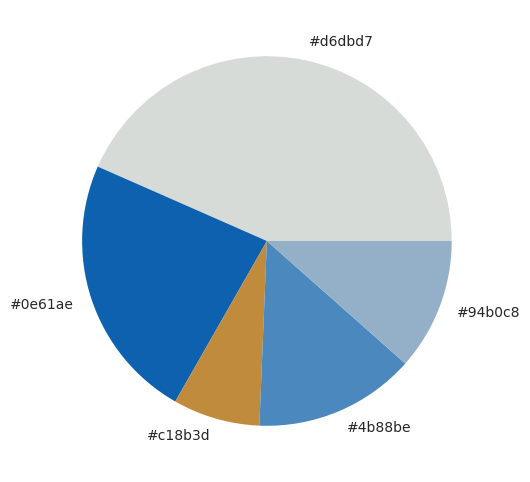

In [278]:
get_colors(get_image("../raw_data/test/2016-00460_o3.jpg"), 5, True)

dict_values([3675, 130107, 95658])
['#444442', '#f7f0e6', '#f5c84b']


(['#444442', '#f7f0e6', '#f5c84b'],
 array([[ 68.50802721,  68.41687075,  66.19428571],
        [247.98976996, 240.49893549, 230.45394944],
        [245.3565201 , 200.6718309 ,  75.2116812 ]]),
 dict_values([3675, 130107, 95658]))

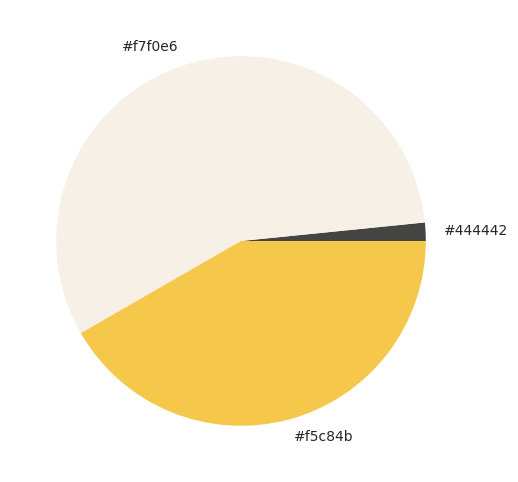

In [271]:
get_colors(get_image("../raw_data/test/2010-00832_o3.jpg"), 3, True)

dict_values([95163, 129664, 3674, 939])
['#f5c84a', '#f7f0e6', '#444442', '#f6de97']


['#f5c84a', '#f7f0e6', '#444442', '#f6de97']

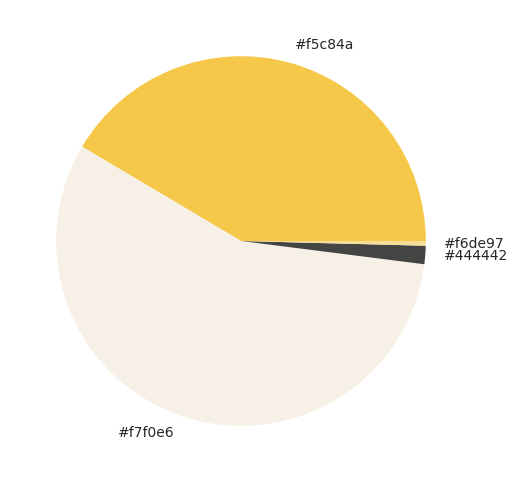

In [19]:
get_colors(get_image("../raw_data/test/2010-00832_o3.jpg"), 4, True)

dict_values([79977, 48139, 3673, 49704, 47040, 907])
['#faf2e8', '#f2c649', '#444442', '#f4ede3', '#f7cb4b', '#f6de97']


['#faf2e8', '#f2c649', '#444442', '#f4ede3', '#f7cb4b', '#f6de97']

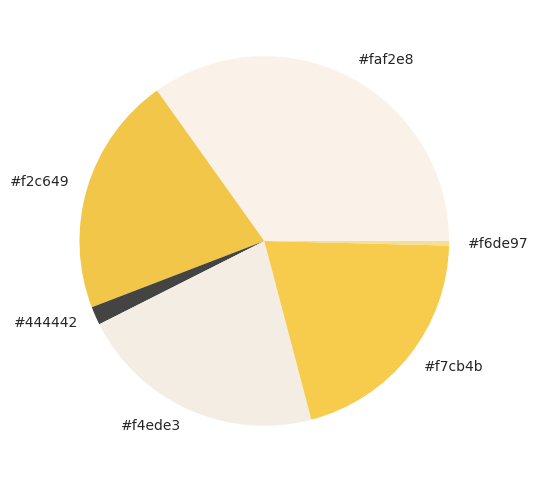

In [20]:
get_colors(get_image("../raw_data/test/2010-00832_o3.jpg"), 6, True)

In [9]:
visualizer.elbow_value_

7

dict_values([22355, 63933, 3584, 20860, 35877, 526, 50374, 102, 551, 29629, 1530, 119])
['#f1c449', '#faf2e8', '#434341', '#f9cc4c', '#f3ece3', '#fbe183', '#f5c84a', '#cab2ab', '#fbe7b8', '#f7f0e6', '#fcd755', '#867a57']


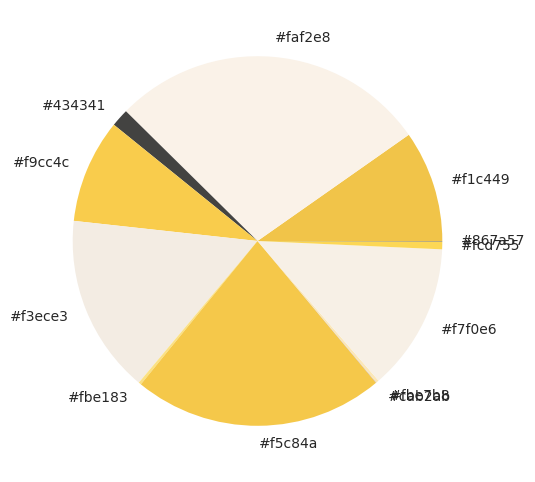

In [50]:
hex_colors, X, y = get_colors(get_image(filename), 12, True)

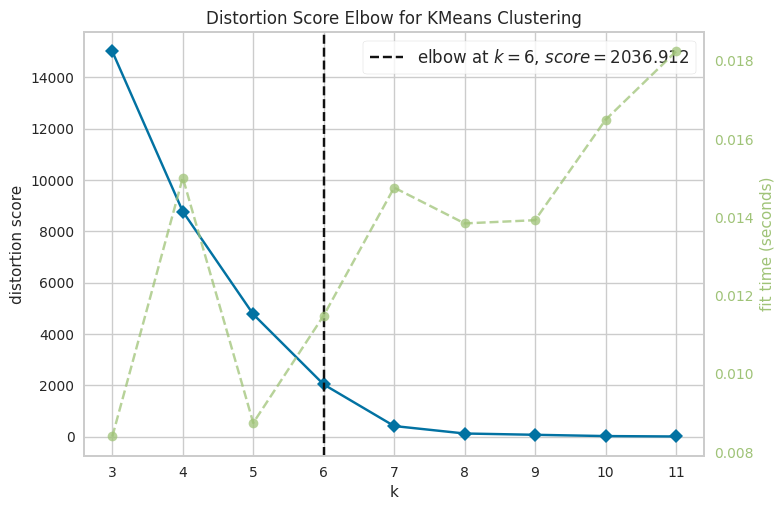

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
X, y = X, y

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [52]:
visualizer.elbow_value_

6

dict_values([42720, 48137, 3673, 905, 86966, 47039])
['#f3ede3', '#f2c649', '#444442', '#f6de96', '#faf2e8', '#f7cb4b']


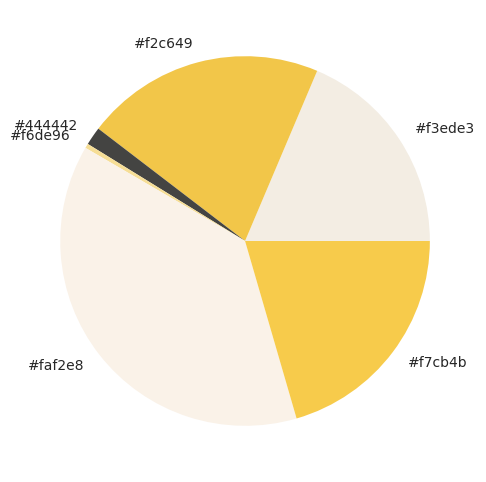

In [53]:
hex_colors, X, y = get_colors(get_image(filename), 6, True)

In [205]:
data = {}

In [206]:
data['id'] = fname

In [208]:
for i in range(len(hex_colors)):
    data[str(i)] = hex_colors[i]

In [209]:
len(hex_colors)

6

In [210]:
counter = 0
for i in hex_colors:
    print(i)

#f3ede3
#f2c649
#444442
#f6de96
#faf2e8
#f7cb4b


In [222]:
data

{'id': '2010-00832_o3',
 '0': '#f3ede3',
 '1': '#f2c649',
 '2': '#444442',
 '3': '#f6de96',
 '4': '#faf2e8',
 '5': '#f7cb4b'}

In [220]:
df = pd.read_csv('../raw_data/df_10K_copy.csv')

In [221]:
df = df.copy()

In [215]:
df.columns

Index(['Unnamed: 0', 'id', '0', '1', '2', '3', '4', '5'], dtype='object')

In [152]:
type(df.columns[6])

str

In [131]:
df

,Unnamed: 0,id,0,1,2,3,4,5
0,0,2012-00335,#c6b089,#6f6457,#dfc499,#9f8871,NaN,NaN
1,1,2010-01385,#656559,#d9bd3f,#383d37,#136949,#b0726b,NaN
2,2,2015-00358,#ebb87e,#534332,#c59962,#8d6e47,NaN,NaN
3,3,2002-00783,#aeafa7,#7f665e,#5c514e,#99887c,NaN,NaN
4,4,2016-00456,#3d3a36,#e3dbd0,#857e74,#c1b9ae,NaN,NaN
...,...,...,...,...,...,...,...,...
4375,4375,2012-00261,#484a49,#f0ece3,#80807d,#bbbbb6,NaN,NaN
4376,4376,2009-03342,#dcceb8,#9d917e,#baae99,#827668,NaN,NaN
4377,4377,2010-04023,#201c20,#c0ab92,#8b7059,#ae9478,NaN,NaN
4378,4378,2016-00196,#202626,#627677,#394544,#151717,NaN,NaN


In [140]:
type(data)

dict

In [223]:
data_df = pd.DataFrame([data])

In [224]:
data_df.columns

Index(['id', '0', '1', '2', '3', '4', '5'], dtype='object')

In [225]:
new_df = pd.concat([df, data_df])

In [226]:
new_df

,Unnamed: 0,id,0,1,2,3,4,5
0,0.0,2012-00335,#c6b089,#6f6457,#dfc499,#9f8871,NaN,NaN
1,1.0,2010-01385,#656559,#d9bd3f,#383d37,#136949,#b0726b,NaN
2,2.0,2015-00358,#ebb87e,#534332,#c59962,#8d6e47,NaN,NaN
3,3.0,2002-00783,#aeafa7,#7f665e,#5c514e,#99887c,NaN,NaN
4,4.0,2016-00456,#3d3a36,#e3dbd0,#857e74,#c1b9ae,NaN,NaN
...,...,...,...,...,...,...,...,...
4376,4376.0,2009-03342,#dcceb8,#9d917e,#baae99,#827668,NaN,NaN
4377,4377.0,2010-04023,#201c20,#c0ab92,#8b7059,#ae9478,NaN,NaN
4378,4378.0,2016-00196,#202626,#627677,#394544,#151717,NaN,NaN
4379,4379.0,2003-03695,#adb3aa,#776259,#b9645d,#d2c0ac,#81908f,#c7977d


# Create API to add to csv after upload